# Mervar - Biological Plausibility
## 2.23.2022

### Backpropogation Code (Assignment 5)

In [55]:
import numpy as np

learningRate = 1

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
syn0 = 2*np.random.random((3,10)) - 1
syn1 = 2*np.random.random((10,1)) - 1

# Create an empty array for SSE
backpropError = []

# training step
for i in range(10000):

    l0 = x
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))

    l2_error = y - l2

    # Add the SSE to the array
    backpropError.append(sum(l2_error**2))

    if(i % 1000) == 0:
        print("Backpropogation Error: " + str(np.mean(np.abs(l2_error))))

    l2_delta = learningRate * l2_error*nonlin(l2, deriv=True)

    l1_error = l2_delta.dot(syn1.T)

    l1_delta = learningRate * l1_error * nonlin(l1,deriv=True)

    # update synapse weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print("BACKPROPOGATION - Output after training:")
print(l2)

Backpropogation Error: 0.502439933352217
Backpropogation Error: 0.037318487181256174
Backpropogation Error: 0.022405480063085636
Backpropogation Error: 0.017182458875661347
Backpropogation Error: 0.014361007469124831
Backpropogation Error: 0.012543633660893661
Backpropogation Error: 0.01125360515154734
Backpropogation Error: 0.010279468043227913
Backpropogation Error: 0.009511611870190693
Backpropogation Error: 0.008886960308784927
BACKPROPOGATION - Output after training:
[[0.00777717]
 [0.9918261 ]
 [0.99145049]
 [0.00896683]]


### Exercise 1
**Submit a copy of your code.**
### Feedback Alignment

In [56]:
import numpy as np

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
forwardSyn0 = 2*np.random.random((3,10)) - 1
forwardSyn1 = 2*np.random.random((10,1)) - 1
# New fixed backward weights with SMALL and RANDOM values
backwardSyn0 = 2*np.random.random((1,10)) - 1

# training step
for i in range(10000):

    fl0 = x
    fl1 = nonlin(np.dot(fl0, forwardSyn0))
    fl2 = nonlin(np.dot(fl1, forwardSyn1))

    l2_error = y - fl2

    # Feedback Alignment Network Nodes
    bl0 = y - fl2
    bl1 = np.dot(bl0, backwardSyn0)

    if(i % 1000) == 0:
        print("Feedback Alignment Error: " + str(np.mean(np.abs(l2_error))))

    # ========================
    # Old Backpropagation Code
    # oldl2_delta = l2_error*nonlin(fl2, deriv=True)

    # oldl1_error = l2_delta.dot(forwardSyn1.T)

    # oldl1_delta = l1_error * nonlin(fl1,deriv=True)
    # ======================
    
    # update synapse weights
    l2_delta = bl0 * learningRate * nonlin(fl2, deriv=True)
    l1_delta = bl1 * learningRate * nonlin(fl1, deriv=True)

    forwardSyn1 += fl1.T.dot(l2_delta)
    forwardSyn0 += fl0.T.dot(l1_delta)

print("FEEDBACK ALIGNMENT - Output after training:")
print(fl2)

Feedback Alignment Error: 0.502439933352217
Feedback Alignment Error: 0.023916711265137145
Feedback Alignment Error: 0.01355480288929679
Feedback Alignment Error: 0.009940128624436103
Feedback Alignment Error: 0.008049102645006443
Feedback Alignment Error: 0.00687051996891936
Feedback Alignment Error: 0.0060582275629699955
Feedback Alignment Error: 0.0054603025364596425
Feedback Alignment Error: 0.004999242393787973
Feedback Alignment Error: 0.004631231933715055
FEEDBACK ALIGNMENT - Output after training:
[[0.00230694]
 [0.99617988]
 [0.99474609]
 [0.00593839]]


### Exercise 2
**Run the network with**
- **10 hidden units**
- **10000 epochs**
- **learning rate of 0.001** 
**Plot the SSE as a function of training epoch (with the vertical axis SSE on a log scale), and also plot the angle between the backward and forward weight vectors at the output as a function of training epoch. Submit your plots to canvas.**

### Feedback Alignment

Feedback Alignment Error: 0.502439933352217
Feedback Alignment Error: 0.5025922004630711
Feedback Alignment Error: 0.5027575606349524
Feedback Alignment Error: 0.5029375902451838
Feedback Alignment Error: 0.5031315548964916
Feedback Alignment Error: 0.5033365231244414
Feedback Alignment Error: 0.5035473630275258
Feedback Alignment Error: 0.5037568628460604
Feedback Alignment Error: 0.5039560946670545
Feedback Alignment Error: 0.5041350298044728
FEEDBACK ALIGNMENT - Output after training:
[[0.53544787]
 [0.49366133]
 [0.48718572]
 [0.46253193]]


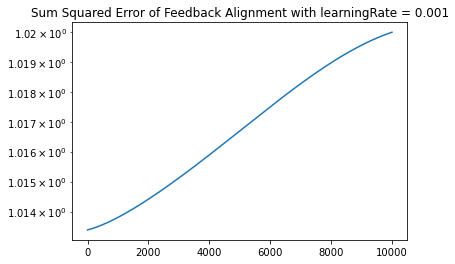

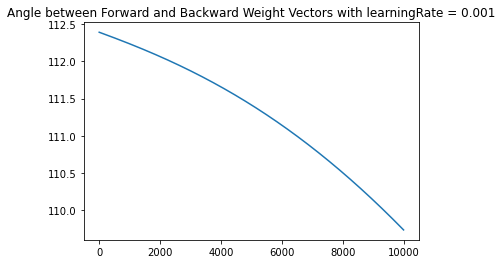

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math

learningRate = 0.001

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
forwardSyn0 = 2*np.random.random((3,10)) - 1
forwardSyn1 = 2*np.random.random((10,1)) - 1
# New fixed backward weights with SMALL and RANDOM values
backwardSyn0 = 2*np.random.random((1,10)) - 1

# Create an empty array for SSE
squaredError = []

# Create an empty array for the angle between weight vectors
angle = []

# training step
for i in range(10000):

    fl0 = x
    fl1 = nonlin(np.dot(fl0, forwardSyn0))
    fl2 = nonlin(np.dot(fl1, forwardSyn1))

    l2_error = y - fl2

    # Add value to squaredError array
    squaredError.append(sum(l2_error**2))

    # Feedback Alignment Network Nodes
    bl0 = y - fl2
    bl1 = np.dot(bl0, backwardSyn0)

    if(i % 1000) == 0:
        print("Feedback Alignment Error: " + str(np.mean(np.abs(l2_error))))

    # ========================
    # Old Backpropagation Code
    # oldl2_delta = l2_error*nonlin(fl2, deriv=True)

    # oldl1_error = l2_delta.dot(forwardSyn1.T)

    # oldl1_delta = l1_error * nonlin(fl1,deriv=True)
    # ======================
    
    # update synapse weights
    l2_delta = bl0 * learningRate * nonlin(fl2, deriv=True)
    l1_delta = bl1 * learningRate * nonlin(fl1, deriv=True)

    forwardSyn1 += fl1.T.dot(l2_delta)
    forwardSyn0 += fl0.T.dot(l1_delta)

    # Calculate the angle between the weight vectors backwardSyn0 and forwardSyn1
    dotProduct = np.dot(backwardSyn0, forwardSyn1)
    angleBetween = np.arccos(dotProduct/(np.sqrt(np.sum((backwardSyn0**2))*np.sum((forwardSyn1**2)))))
    # Add value to angle array
    angle.append(math.degrees(angleBetween[0][0]))

print("FEEDBACK ALIGNMENT - Output after training:")
print(fl2)

plt.semilogy(squaredError)
plt.title("Sum Squared Error of Feedback Alignment with learningRate = 0.001")
plt.show()

plt.plot(angle)
plt.title("Angle between Forward and Backward Weight Vectors with learningRate = 0.001")
plt.show()

So, these plot are correct and what I expect to see. But, because the learningRate is so low, these graphs are visually off. Please see next code block for simulation at learningRate = 1.

Feedback Alignment Error: 0.502439933352217
Feedback Alignment Error: 0.023916711265137145
Feedback Alignment Error: 0.01355480288929679
Feedback Alignment Error: 0.009940128624436103
Feedback Alignment Error: 0.008049102645006443
Feedback Alignment Error: 0.00687051996891936
Feedback Alignment Error: 0.0060582275629699955
Feedback Alignment Error: 0.0054603025364596425
Feedback Alignment Error: 0.004999242393787973
Feedback Alignment Error: 0.004631231933715055
FEEDBACK ALIGNMENT - Output after training:
[[0.00230694]
 [0.99617988]
 [0.99474609]
 [0.00593839]]


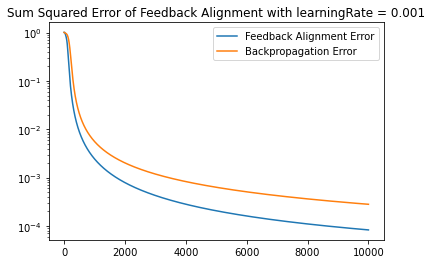

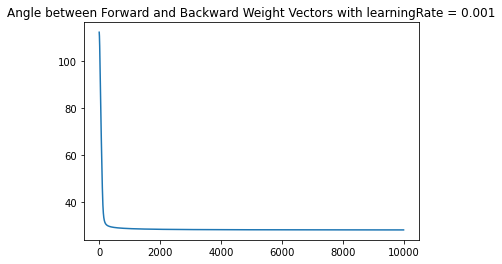

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math

learningRate = 1

def nonlin(x, deriv=False):
    if (deriv==True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))

# input dataset as a matrix for the XOR problem
x = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])

# output dataset as a matrix for the XOR problem
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)

# synapse matrices
forwardSyn0 = 2*np.random.random((3,10)) - 1
forwardSyn1 = 2*np.random.random((10,1)) - 1
# New fixed backward weights with SMALL and RANDOM values
backwardSyn0 = 2*np.random.random((1,10)) - 1

# Create an empty array for SSE
squaredError = []

# Create an empty array for the angle between weight vectors
angle = []

# training step
for i in range(10000):

    fl0 = x
    fl1 = nonlin(np.dot(fl0, forwardSyn0))
    fl2 = nonlin(np.dot(fl1, forwardSyn1))

    l2_error = y - fl2

    # Add value to squaredError array
    squaredError.append(sum(l2_error**2))

    # Feedback Alignment Network Nodes
    bl0 = y - fl2
    bl1 = np.dot(bl0, backwardSyn0)

    if(i % 1000) == 0:
        print("Feedback Alignment Error: " + str(np.mean(np.abs(l2_error))))

    # ========================
    # Old Backpropagation Code
    # oldl2_delta = l2_error*nonlin(fl2, deriv=True)

    # oldl1_error = l2_delta.dot(forwardSyn1.T)

    # oldl1_delta = l1_error * nonlin(fl1,deriv=True)
    # ======================
    
    # update synapse weights
    l2_delta = bl0 * learningRate * nonlin(fl2, deriv=True)
    l1_delta = bl1 * learningRate * nonlin(fl1, deriv=True)

    forwardSyn1 += fl1.T.dot(l2_delta)
    forwardSyn0 += fl0.T.dot(l1_delta)

    # Calculate the angle between the weight vectors backwardSyn0 and forwardSyn1
    dotProduct = np.dot(backwardSyn0, forwardSyn1)
    angleBetween = np.arccos(dotProduct/(np.sqrt(np.sum((backwardSyn0**2))*np.sum((forwardSyn1**2)))))
    # Add value to angle array
    angle.append(math.degrees(angleBetween[0][0]))

print("FEEDBACK ALIGNMENT - Output after training:")
print(fl2)

plt.semilogy(squaredError)
plt.semilogy(backpropError)
plt.legend(["Feedback Alignment Error", "Backpropagation Error"])
plt.title("Sum Squared Error of Feedback Alignment with learningRate = 0.001")
plt.show()

plt.plot(angle)
plt.title("Angle between Forward and Backward Weight Vectors with learningRate = 0.001")
plt.show()

As you can see, the SSE is drastically going down. Compared to backprop, feedback alignment is much better. Additionally, we see the angle converge towards zero. This is because at first the weight vectors are independent of one another at first. They never get to zero because the backwards weights are fixed.